In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import shapiro, f_oneway, skew, kurtosis, wilcoxon, ttest_rel, chi2_contingency
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./data.csv')
df.head(10)

,Timestamp,Are you 18 years or older and willing to participate voluntarily?,What is your age group?,What is your gender?,What is your highest level of education?,"How often do you watch video ads on platforms like YouTube, Instagram, or TikTok?","How familiar are you with AI-generated content (e.g., AI-made videos/images)?",Ad: A,Ad: B,The ad feels original and creative?_A,...,The ad presents the product in an imaginative way?_B,The ad feels genuine and trustworthy?_B,The ad aligns well with what I expect from a fashion brand?_B,This ad appears to have been produced quickly?_B,The visual quality suggests minimal production time?_B,This ad seems inexpensive to produce?_B,I believe less effort or budget went into making this ad?_B,Which ad did you prefer overall?,Which ad do you think was created using AI?,Would you mind if ads were created using AI as long as they are effective?
0,2025/06/21 5:22:28 pm EEST,Yes,23-27,Male,Master's,5,4,3,5,3,...,5,5,5,5,5,5,5,Ad B,Ad B,No
1,2025/06/21 5:29:05 pm EEST,Yes,23-27,Male,Master's,5,5,3,5,3,...,4,5,4,2,2,1,2,Ad B,Ad A,No
2,2025/06/21 5:59:31 pm EEST,Yes,28-50,Female,Master's,5,5,3,3,3,...,4,4,4,4,4,4,4,Ad A,Ad B,Yes
3,2025/06/21 6:36:08 pm EEST,Yes,23-27,Male,Master's,4,5,3,4,3,...,4,3,5,3,4,3,2,Ad B,Ad A,No
4,2025/06/21 7:41:10 pm EEST,Yes,23-27,Female,Master's,1,5,3,5,5,...,5,5,5,1,1,1,1,Ad A,Ad A,Yes
5,2025/06/21 7:41:13 pm EEST,Yes,23-27,Female,Bachelor's,3,5,3,3,3,...,3,3,3,4,3,4,3,Ad B,Ad A,No
6,2025/06/21 7:43:09 pm EEST,Yes,23-27,Female,Master's,3,5,2,4,2,...,3,3,4,3,4,3,2,Ad B,Ad A,No
7,2025/06/21 9:25:23 pm EEST,Yes,28-50,Female,Master's,5,4,3,3,3,...,3,3,3,4,4,4,4,Ad B,Ad A,No
8,2025/06/21 10:18:19 pm EEST,Yes,23-27,Male,Bachelor's,3,5,4,5,3,...,2,2,2,5,5,5,5,Ad B,Ad B,Yes
9,2025/06/21 10:32:55 pm EEST,Yes,28-50,Female,Bachelor's,2,1,3,2,1,...,1,1,1,4,4,4,4,Ad A,Ad A,No


In [6]:
df.columns

Index(['Timestamp',
       'Are you 18 years or older and willing to participate voluntarily?  ',
       '  What is your age group?   ', 'What is your gender?  ',
       'What is your highest level of education?  ',
       'How often do you watch video ads on platforms like YouTube, Instagram, or TikTok?  ',
       'How familiar are you with AI-generated content (e.g., AI-made videos/images)?  ',
       ' Ad: A ', 'Ad: B   ', 'The ad feels original and creative?_A',
       'The ad presents the product in an imaginative way?_A',
       'The ad feels genuine and trustworthy?_A',
       'The ad aligns well with what I expect from a fashion brand?_A',
       'This ad appears to have been produced quickly?_A',
       'The visual quality suggests minimal production time?_A',
       'This ad seems inexpensive to produce?_A',
       'I believe less effort or budget went into making this ad?_A',
       'The ad feels original and creative?_B',
       'The ad presents the product in an imaginativ

In [7]:
df = df[[ '  What is your age group?   ', 'What is your gender?  ',
       'What is your highest level of education?  ',
       'How often do you watch video ads on platforms like YouTube, Instagram, or TikTok?  ',
       'How familiar are you with AI-generated content (e.g., AI-made videos/images)?  ','The ad feels original and creative?_A',
       'The ad presents the product in an imaginative way?_A',
       'The ad feels genuine and trustworthy?_A',
       'The ad aligns well with what I expect from a fashion brand?_A',
       'This ad appears to have been produced quickly?_A',
       'The visual quality suggests minimal production time?_A',
       'This ad seems inexpensive to produce?_A',
       'I believe less effort or budget went into making this ad?_A',
       'The ad feels original and creative?_B',
       'The ad presents the product in an imaginative way?_B',
       'The ad feels genuine and trustworthy?_B',
       'The ad aligns well with what I expect from a fashion brand?_B',
       'This ad appears to have been produced quickly?_B',
       'The visual quality suggests minimal production time?_B',
       'This ad seems inexpensive to produce?_B',
       'I believe less effort or budget went into making this ad?_B',
       'Which ad did you prefer overall?  ',
       'Which ad do you think was created using AI?  ']]

In [8]:
len(df.columns)

23

In [9]:
dff = pd.DataFrame({
    'age': df['  What is your age group?   '], 'gender': df['What is your gender?  '], 'ad_exposure': df['How often do you watch video ads on platforms like YouTube, Instagram, or TikTok?  '], 'ai_exposure': df[ 'How familiar are you with AI-generated content (e.g., AI-made videos/images)?  '], 'creativity_a': df[['The ad feels original and creative?_A', 'The ad presents the product in an imaginative way?_A']].mean(axis=1),  'creativity_b': df[['The ad feels original and creative?_B', 'The ad presents the product in an imaginative way?_B']].mean(axis=1), 'authenticity_a': df[['The ad feels genuine and trustworthy?_A',  'The ad aligns well with what I expect from a fashion brand?_A']].mean(axis=1),  'authenticity_b': df[['The ad feels genuine and trustworthy?_B',  'The ad aligns well with what I expect from a fashion brand?_B']].mean(axis=1), 'production_speed_a': df[['This ad appears to have been produced quickly?_A', 'The visual quality suggests minimal production time?_A']].mean(axis=1),   'production_speed_b': df[['This ad appears to have been produced quickly?_B', 'The visual quality suggests minimal production time?_B']].mean(axis=1), 'cost_eff_a': df[['This ad seems inexpensive to produce?_A', 'I believe less effort or budget went into making this ad?_A']].mean(axis=1),  'cost_eff_b': df[['This ad seems inexpensive to produce?_B', 'I believe less effort or budget went into making this ad?_B']].mean(axis=1), 'ad_preference' : df['Which ad did you prefer overall?  '] , 'ad_prediction': df['Which ad do you think was created using AI?  ']
})

In [10]:
dff.columns

Index(['age', 'gender', 'ad_exposure', 'ai_exposure', 'creativity_a',
       'creativity_b', 'authenticity_a', 'authenticity_b',
       'production_speed_a', 'production_speed_b', 'cost_eff_a', 'cost_eff_b',
       'ad_preference', 'ad_prediction'],
      dtype='object')

In [11]:
dff.head()

,age,gender,ad_exposure,ai_exposure,creativity_a,creativity_b,authenticity_a,authenticity_b,production_speed_a,production_speed_b,cost_eff_a,cost_eff_b,ad_preference,ad_prediction
0,23-27,Male,5,4,4.0,5.0,4.0,5.0,5.0,5.0,3.0,5.0,Ad B,Ad B
1,23-27,Male,5,5,3.0,4.5,3.0,4.5,4.5,2.0,5.0,1.5,Ad B,Ad A
2,28-50,Female,5,5,3.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,Ad A,Ad B
3,23-27,Male,4,5,3.0,4.0,2.5,4.0,4.5,3.5,4.5,2.5,Ad B,Ad A
4,23-27,Female,1,5,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,Ad A,Ad A


In [12]:
dff['age'].unique()

array(['23-27', '28-50', '18-22', '51 and above'], dtype=object)

In [13]:
dff['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [14]:
ad_mapping = {'Ad A': 1, 'Ad B': 2}

dff['ad_preference'] = dff['ad_preference'].map(ad_mapping)
dff['ad_prediction'] = dff['ad_prediction'].map(ad_mapping)

age_mapping = {'18-22': 1, '23-27': 2, '28-50': 3, '51 and above': 4}
gender_mapping = {'Male': 1, 'Female': 2, 'Other': 3}

dff['age'] = dff['age'].map(age_mapping)
dff['gender'] = dff['gender'].map(gender_mapping)

In [15]:
dff.head()

,age,gender,ad_exposure,ai_exposure,creativity_a,creativity_b,authenticity_a,authenticity_b,production_speed_a,production_speed_b,cost_eff_a,cost_eff_b,ad_preference,ad_prediction
0,2,1,5,4,4.0,5.0,4.0,5.0,5.0,5.0,3.0,5.0,2,2
1,2,1,5,5,3.0,4.5,3.0,4.5,4.5,2.0,5.0,1.5,2,1
2,3,2,5,5,3.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,1,2
3,2,1,4,5,3.0,4.0,2.5,4.0,4.5,3.5,4.5,2.5,2,1
4,2,2,1,5,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1,1


# data mean

In [16]:
dff.mean()

age                   2.305556
gender                1.488889
ad_exposure           4.122222
ai_exposure           4.194444
creativity_a          3.669444
creativity_b          3.730556
authenticity_a        3.541667
authenticity_b        3.647222
production_speed_a    3.333333
production_speed_b    3.172222
cost_eff_a            3.247222
cost_eff_b            2.980556
ad_preference         1.500000
ad_prediction         1.494444
dtype: float64

# data standard deviation

In [17]:
dff.std()

age                   0.832961
gender                0.533659
ad_exposure           0.961002
ai_exposure           1.008884
creativity_a          1.141111
creativity_b          1.093868
authenticity_a        1.040889
authenticity_b        1.047339
production_speed_a    1.160331
production_speed_b    1.087412
cost_eff_a            1.213860
cost_eff_b            1.221735
ad_preference         0.501395
ad_prediction         0.501364
dtype: float64

In [18]:
dff[['ad_exposure', 'ai_exposure', 'creativity_a',
       'creativity_b', 'authenticity_a', 'authenticity_b',
       'production_speed_a', 'production_speed_b', 'cost_eff_a',
       'cost_eff_b']].corr()

,ad_exposure,ai_exposure,creativity_a,creativity_b,authenticity_a,authenticity_b,production_speed_a,production_speed_b,cost_eff_a,cost_eff_b
ad_exposure,1.000000,0.274981,0.421676,0.167021,0.410958,0.159640,0.206246,0.198930,0.136782,0.159057
ai_exposure,0.274981,1.000000,0.211427,0.265415,0.242276,0.282053,0.213956,0.027866,0.179495,0.000818
creativity_a,0.421676,0.211427,1.000000,0.071467,0.778320,0.026924,-0.116733,0.130551,-0.317778,0.231789
creativity_b,0.167021,0.265415,0.071467,1.000000,0.112953,0.834539,0.180094,-0.203821,0.263973,-0.242218
authenticity_a,0.410958,0.242276,0.778320,0.112953,1.000000,0.072491,-0.132984,0.084935,-0.325444,0.133530
authenticity_b,0.159640,0.282053,0.026924,0.834539,0.072491,1.000000,0.242110,-0.167094,0.320559,-0.248795
production_speed_a,0.206246,0.213956,-0.116733,0.180094,-0.132984,0.242110,1.000000,0.298496,0.771134,0.162231
production_speed_b,0.198930,0.027866,0.130551,-0.203821,0.084935,-0.167094,0.298496,1.000000,0.261714,0.727914
cost_eff_a,0.136782,0.179495,-0.317778,0.263973,-0.325444,0.320559,0.771134,0.261714,1.000000,0.134165
cost_eff_b,0.159057,0.000818,0.231789,-0.242218,0.133530,-0.248795,0.162231,0.727914,0.134165,1.000000


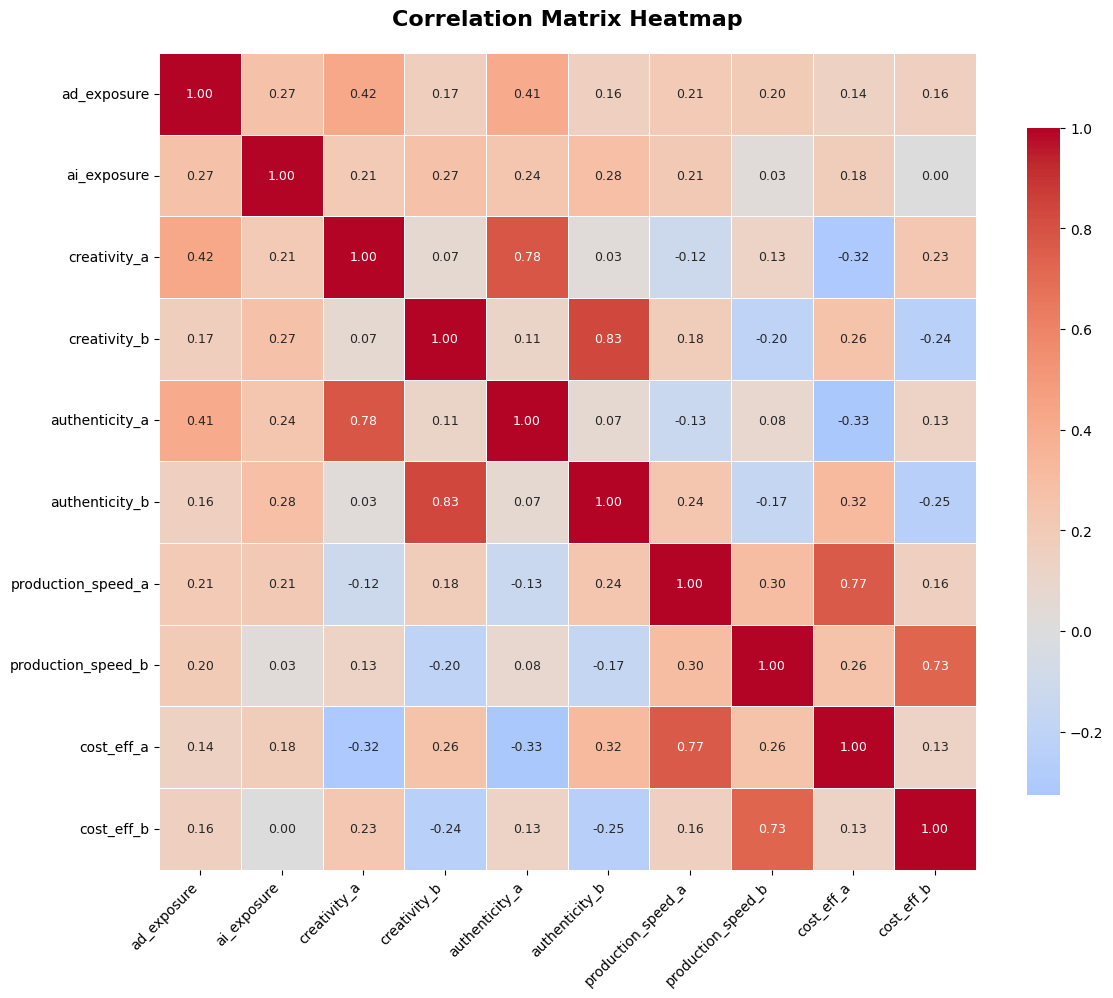

Correlation Matrix:
                    ad_exposure  ai_exposure  creativity_a  creativity_b  \
ad_exposure               1.000        0.275         0.422         0.167   
ai_exposure               0.275        1.000         0.211         0.265   
creativity_a              0.422        0.211         1.000         0.071   
creativity_b              0.167        0.265         0.071         1.000   
authenticity_a            0.411        0.242         0.778         0.113   
authenticity_b            0.160        0.282         0.027         0.835   
production_speed_a        0.206        0.214        -0.117         0.180   
production_speed_b        0.199        0.028         0.131        -0.204   
cost_eff_a                0.137        0.179        -0.318         0.264   
cost_eff_b                0.159        0.001         0.232        -0.242   

                    authenticity_a  authenticity_b  production_speed_a  \
ad_exposure                  0.411           0.160               0.20

In [42]:
correlation_matrix = dff[['ad_exposure', 'ai_exposure', 'creativity_a',
                          'creativity_b', 'authenticity_a', 'authenticity_b',
                          'production_speed_a', 'production_speed_b', 'cost_eff_a',
                          'cost_eff_b']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme (blue-white-red)
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            fmt='.2f',            # Format numbers to 2 decimal places (better for larger matrix)
            cbar_kws={'shrink': 0.8},  # Adjust colorbar size
            linewidths=0.5,       # Add lines between cells
            annot_kws={'size': 9})  # Smaller text size for readability

plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')  # Remove x-axis label (redundant with tick labels)
plt.ylabel('')  # Remove y-axis label (redundant with tick labels)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

plt.tight_layout()

plt.show()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

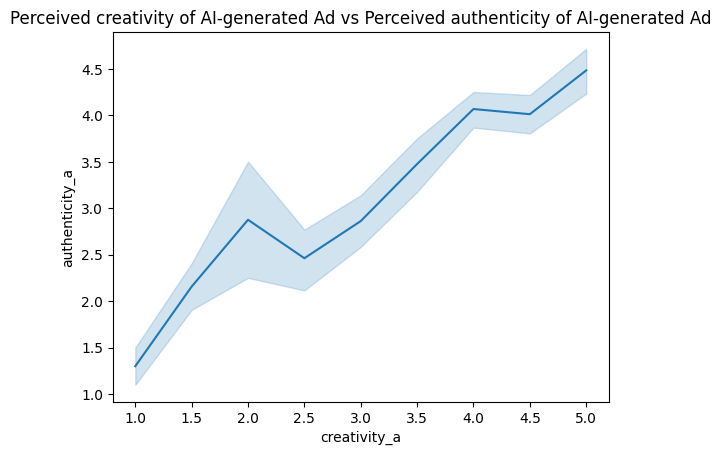

In [19]:
sns.lineplot(data=dff, x='creativity_a', y='authenticity_a')
plt.title('Perceived creativity of AI-generated Ad vs Perceived authenticity of AI-generated Ad')
plt.show()

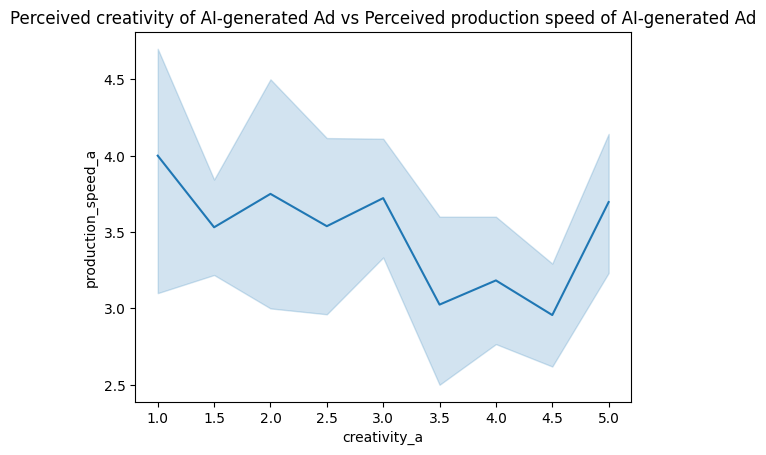

In [20]:
sns.lineplot(data=dff, x='creativity_a', y='production_speed_a')
plt.title('Perceived creativity of AI-generated Ad vs Perceived production speed of AI-generated Ad')
plt.show()

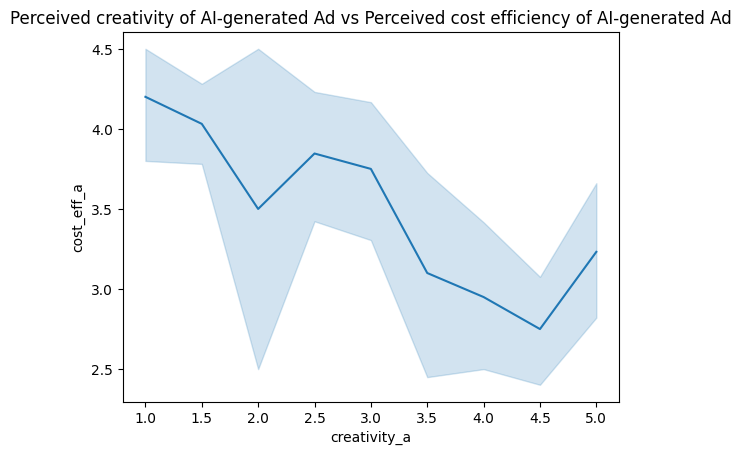

In [21]:
sns.lineplot(data=dff, x='creativity_a', y='cost_eff_a')
plt.title('Perceived creativity of AI-generated Ad vs Perceived cost efficiency of AI-generated Ad')
plt.show()

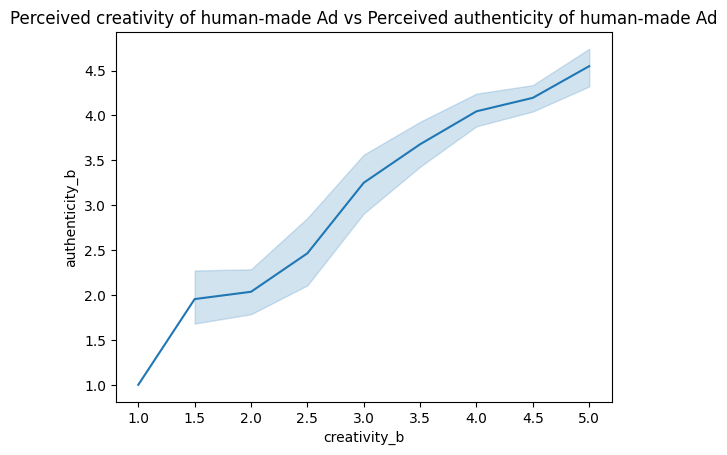

In [22]:
sns.lineplot(data=dff, x='creativity_b', y='authenticity_b')
plt.title('Perceived creativity of human-made Ad vs Perceived authenticity of human-made Ad')
plt.show()

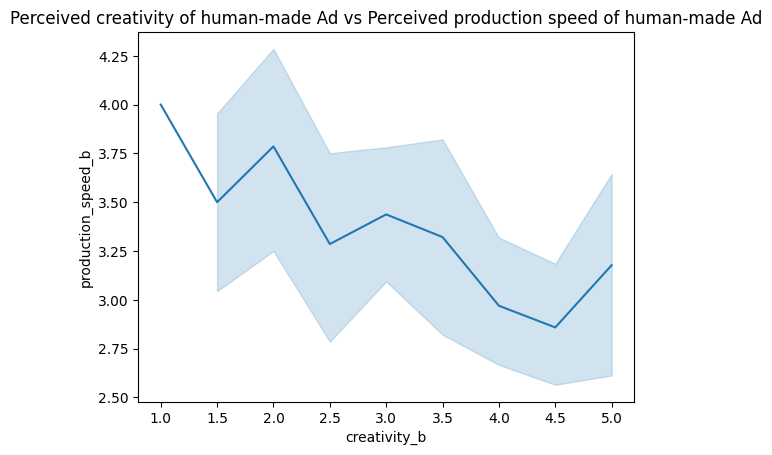

In [23]:
sns.lineplot(data=dff, x='creativity_b', y='production_speed_b')
plt.title('Perceived creativity of human-made Ad vs Perceived production speed of human-made Ad')
plt.show()

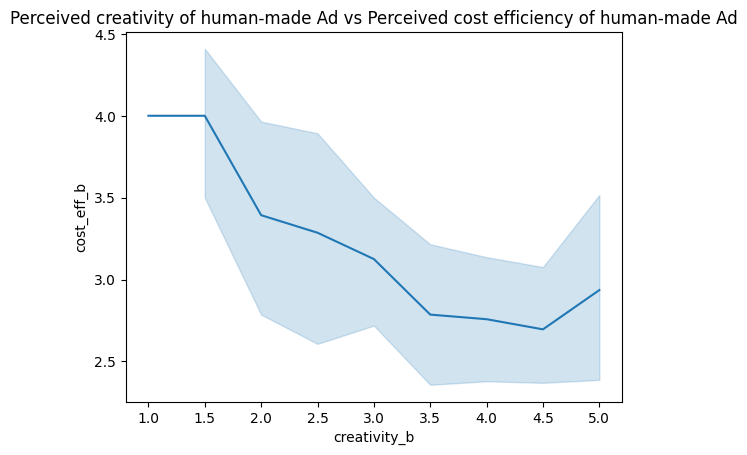

In [24]:
sns.lineplot(data=dff, x='creativity_b', y='cost_eff_b')
plt.title('Perceived creativity of human-made Ad vs Perceived cost efficiency of human-made Ad')
plt.show()

# Overall advertisement preference and prediction breakdown

In [25]:
dff['ad_preference'].value_counts()

ad_preference
2    90
1    90
Name: count, dtype: int64

In [26]:
dff['ad_prediction'].value_counts()

ad_prediction
1    91
2    89
Name: count, dtype: int64

# Advertisement prediction breakdown by age and ai exposure

In [27]:
dff.groupby(['age', 'ai_exposure'])['ad_prediction'].value_counts()

age  ai_exposure  ad_prediction
1    2            1                 2
                  2                 1
     3            2                 4
                  1                 2
     4            1                 5
                  2                 2
     5            2                12
                  1                 4
2    2            2                 2
     3            2                 8
                  1                 5
     4            2                10
                  1                 8
     5            1                20
                  2                19
3    1            1                 2
                  2                 1
     2            1                 1
     3            1                 4
                  2                 1
     4            1                14
                  2                 7
     5            1                18
                  2                17
4    1            2                 1
     2            

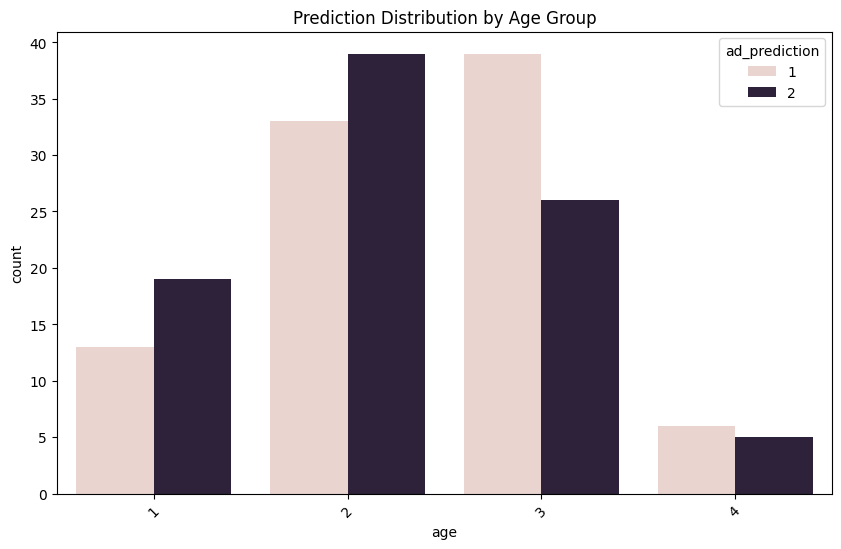

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dff, x='age', hue='ad_prediction')
plt.title('Prediction Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()

# Advertisement prediction breakdown by gender and ai exposure

In [29]:
dff.groupby(['gender', 'ai_exposure'])['ad_prediction'].value_counts()

gender  ai_exposure  ad_prediction
1       2            1                 2
                     2                 2
        3            1                 8
                     2                 5
        4            1                13
                     2                10
        5            2                29
                     1                26
2       1            1                 2
                     2                 2
        2            1                 3
                     2                 2
        3            2                 8
                     1                 3
        4            1                17
                     2                10
        5            2                20
                     1                15
3       3            1                 1
                     2                 1
        5            1                 1
Name: count, dtype: int64

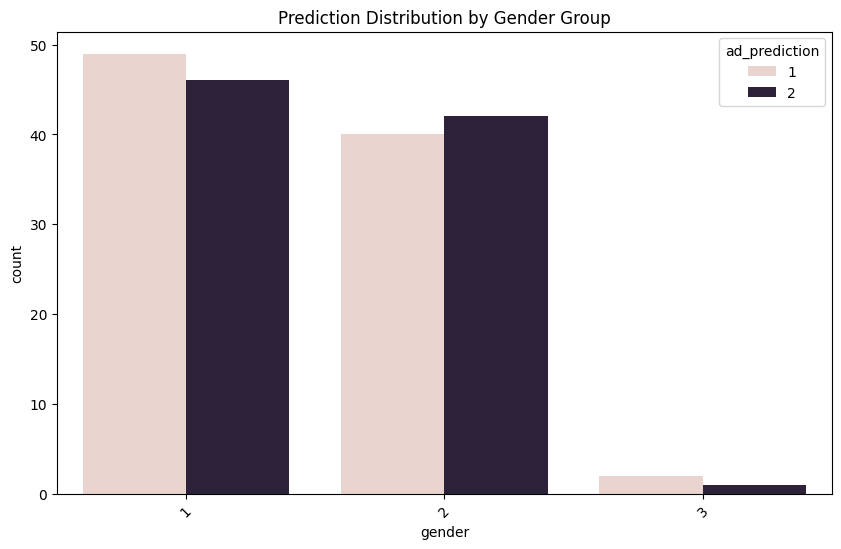

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dff, x='gender', hue='ad_prediction')
plt.title('Prediction Distribution by Gender Group')
plt.xticks(rotation=45)
plt.show()

# Advertisement prediction breakdown by ai exposure

In [31]:
dff.groupby('ai_exposure')['ad_prediction'].value_counts()

ai_exposure  ad_prediction
1            1                 2
             2                 2
2            1                 5
             2                 4
3            2                14
             1                12
4            1                30
             2                20
5            2                49
             1                42
Name: count, dtype: int64

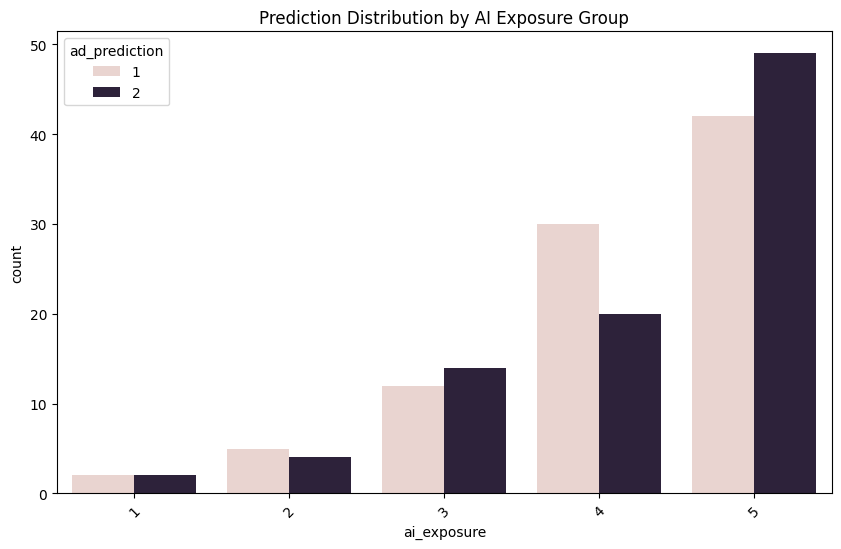

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dff, x='ai_exposure', hue='ad_prediction')
plt.title('Prediction Distribution by AI Exposure Group')
plt.xticks(rotation=45)
plt.show()

# Advertisement prediction breakdown by ad exposure

In [33]:
dff.groupby('ad_exposure')['ad_prediction'].value_counts()

ad_exposure  ad_prediction
1            1                 2
2            1                12
             2                 1
3            1                11
             2                11
4            1                37
             2                30
5            2                47
             1                29
Name: count, dtype: int64

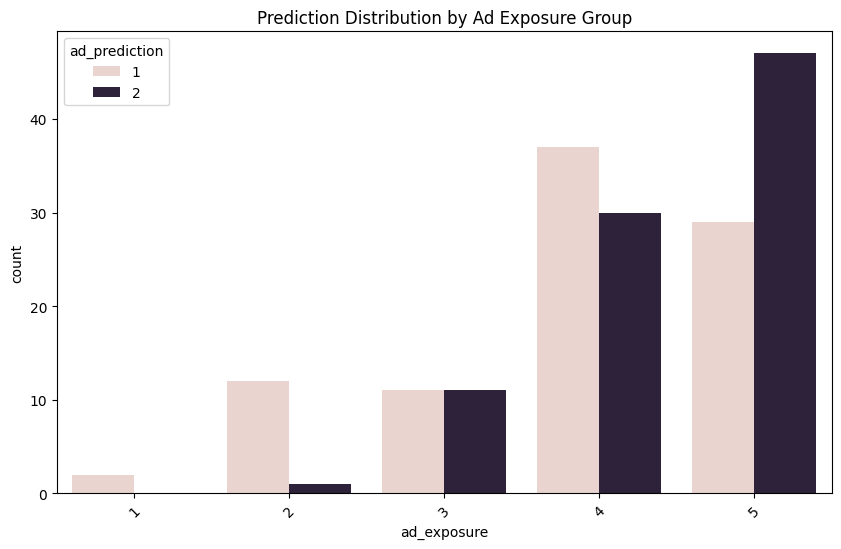

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dff, x='ad_exposure', hue='ad_prediction')
plt.title('Prediction Distribution by Ad Exposure Group')
plt.xticks(rotation=45)
plt.show()

# Quantitative Analysis

In [35]:
feature_pairs = [
    ('creativity_a', 'creativity_b'),
    ('authenticity_a', 'authenticity_b'),
    ('production_speed_a', 'production_speed_b'),
    ('cost_eff_a', 'cost_eff_b')
]

# ==================== CRONBACH'S ALPHA ====================
def cronbachs_alpha(data):
    """
    Calculate Cronbach's Alpha for internal consistency reliability
    
    Parameters:
    data: DataFrame or array-like with items as columns
    
    Returns:
    float: Cronbach's alpha coefficient
    """
    # Number of items
    k = data.shape[1]
    
    # Variance of each item
    item_variances = data.var(axis=0, ddof=1)
    
    # Variance of total scores
    total_variance = data.sum(axis=1).var(ddof=1)
    
    # Cronbach's alpha formula
    alpha = (k / (k - 1)) * (1 - (item_variances.sum() / total_variance))
    
    return alpha

def cronbachs_alpha_if_deleted(data):
    """Calculate Cronbach's alpha if each item is deleted"""
    results = {}
    for col in data.columns:
        subset = data.drop(columns=[col])
        alpha = cronbachs_alpha(subset)
        results[col] = alpha
    return results

print("=" * 60)
print("CRONBACH'S ALPHA ANALYSIS")
print("=" * 60)

# Calculate Cronbach's alpha for each pair
for pair_name, (col_a, col_b) in zip(['Creativity', 'Authenticity', 'Production Speed', 'Cost Efficiency'], feature_pairs):
    pair_data = dff[[col_a, col_b]]
    alpha = cronbachs_alpha(pair_data)
    
    print(f"\n{pair_name} Pair:")
    print(f"  Cronbach's Alpha: {alpha:.4f}")
    
    # Interpretation
    if alpha >= 0.9:
        interpretation = "Excellent reliability"
    elif alpha >= 0.8:
        interpretation = "Good reliability"
    elif alpha >= 0.7:
        interpretation = "Acceptable reliability"
    elif alpha >= 0.6:
        interpretation = "Questionable reliability"
    else:
        interpretation = "Poor reliability"
    
    print(f"  Interpretation: {interpretation}")
    
    # Correlation between items
    correlation = pair_data.corr().iloc[0, 1]
    print(f"  Inter-item correlation: {correlation:.4f}")

# Extract only the feature pair columns for overall analysis
feature_columns = [col for pair in feature_pairs for col in pair]
feature_data = dff[feature_columns]

# Overall Cronbach's alpha for all feature pair items
all_alpha = cronbachs_alpha(feature_data)
print(f"\nOverall Cronbach's Alpha (all feature pair items): {all_alpha:.4f}")

# Alpha if item deleted (only for feature pair columns)
alpha_if_deleted = cronbachs_alpha_if_deleted(feature_data)
print(f"\nCronbach's Alpha if item deleted:")
for item, alpha in alpha_if_deleted.items():
    print(f"  {item}: {alpha:.4f}")

# ==================== SHAPIRO-WILK NORMALITY TEST ====================
print("\n" + "=" * 60)
print("SHAPIRO-WILK NORMALITY TESTS")
print("=" * 60)

def perform_shapiro_test(data, column_name):
    """Perform Shapiro-Wilk test for normality"""
    statistic, p_value = shapiro(data)
    
    print(f"\n{column_name}:")
    print(f"  Shapiro-Wilk statistic: {statistic:.4f}")
    print(f"  p-value: {p_value:.6f}")
    
    if p_value > 0.05:
        print(f"  Result: Data appears normally distributed (p > 0.05)")
    else:
        print(f"  Result: Data does NOT appear normally distributed (p ≤ 0.05)")
    
    return statistic, p_value

# Test normality for each feature pair variable only
shapiro_results = {}
for col in feature_columns:
    stat, p_val = perform_shapiro_test(dff[col], col)
    shapiro_results[col] = {'statistic': stat, 'p_value': p_val}

# Test normality for differences between pairs (col_b - col_a order)
print(f"\nNormality tests for paired differences:")
difference_normality = {}
for pair_name, (col_a, col_b) in zip(['Creativity', 'Authenticity', 'Production Speed', 'Cost Efficiency'], feature_pairs):
    diff = dff[col_b] - dff[col_a]  # col_b - col_a order
    stat, p_val = perform_shapiro_test(diff, f"{pair_name} difference ({col_b} - {col_a})")
    difference_normality[pair_name] = {'statistic': stat, 'p_value': p_val, 'normal': p_val > 0.05}

# ==================== PAIRED COMPARISONS ====================
print("\n" + "=" * 60)
print("PAIRED STATISTICAL TESTS")
print("=" * 60)

def perform_paired_tests(data_b, data_a, pair_name):
    """Perform both paired t-test and Wilcoxon signed-rank test with col_b - col_a order"""
    
    print(f"\n{pair_name} Comparison:")
    print(f"  Sample size: {len(data_a)}")
    print(f"  Mean A: {data_a.mean():.3f} (SD: {data_a.std():.3f})")
    print(f"  Mean B: {data_b.mean():.3f} (SD: {data_b.std():.3f})")
    print(f"  Mean difference (B - A): {(data_b - data_a).mean():.3f}")
    
    # Paired t-test (comparing B to A, so B - A)
    t_stat, t_p = ttest_rel(data_b, data_a)
    print(f"\n  Paired t-test:")
    print(f"    t-statistic: {t_stat:.4f}")
    print(f"    p-value: {t_p:.6f}")
    
    # Wilcoxon signed-rank test
    try:
        w_stat, w_p = wilcoxon(data_b, data_a, alternative='two-sided')
        print(f"\n  Wilcoxon signed-rank test:")
        print(f"    W-statistic: {w_stat:.4f}")
        print(f"    p-value: {w_p:.6f}")
    except ValueError as e:
        print(f"\n  Wilcoxon test error: {e}")
        w_stat, w_p = None, None
    
    # Effect size (Cohen's d for paired samples) - using B - A difference
    diff = data_b - data_a
    cohens_d = diff.mean() / diff.std()
    print(f"\n  Effect size (Cohen's d): {cohens_d:.4f}")
    
    if abs(cohens_d) < 0.2:
        effect_interpretation = "negligible"
    elif abs(cohens_d) < 0.5:
        effect_interpretation = "small"
    elif abs(cohens_d) < 0.8:
        effect_interpretation = "medium"
    else:
        effect_interpretation = "large"
    
    print(f"  Effect size interpretation: {effect_interpretation}")
    
    # Interpretation
    alpha_level = 0.05
    if t_p < alpha_level:
        print(f"  Conclusion: Significant difference found (p < {alpha_level})")
    else:
        print(f"  Conclusion: No significant difference found (p ≥ {alpha_level})")
    
    return {
        't_stat': t_stat, 't_p': t_p,
        'w_stat': w_stat, 'w_p': w_p,
        'cohens_d': cohens_d,
        'mean_diff': diff.mean()
    }

# Perform paired tests with col_b - col_a order
paired_results = {}
for pair_name, (col_a, col_b) in zip(['Creativity', 'Authenticity', 'Production Speed', 'Cost Efficiency'], feature_pairs):
    results = perform_paired_tests(dff[col_b], dff[col_a], pair_name)
    paired_results[pair_name] = results

# ==================== CHI-SQUARE TEST ====================
print("\n" + "=" * 60)
print("CHI-SQUARE TESTS")
print("=" * 60)

def categorize_scores(data, thresholds=[2, 3, 4, 5]):
    """Categorize continuous scores into ordinal categories"""
    categories = []
    for score in data:
        if score <= thresholds[0]:
            categories.append('Very Low')
        elif score <= thresholds[1]:
            categories.append('Low')
        elif score <= thresholds[2]:
            categories.append('Medium')
        elif score <= thresholds[3]:
            categories.append('High')
        else:
            categories.append('Very High')
    return categories

def perform_chi_square_test(data_b, data_a, pair_name):
    """Perform chi-square test of independence on categorized data"""
    
    # Categorize the continuous data
    cat_a = categorize_scores(data_a)
    cat_b = categorize_scores(data_b)
    
    # Create contingency table
    contingency_df = pd.DataFrame({'A': cat_a, 'B': cat_b})
    contingency_table = pd.crosstab(contingency_df['A'], contingency_df['B'])
    
    print(f"\n{pair_name} Chi-square test:")
    print("Contingency Table:")
    print(contingency_table)
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-square statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p_value:.6f}")
    
    # Cramer's V (effect size for chi-square)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
    print(f"Cramer's V (effect size): {cramers_v:.4f}")
    
    if p_value < 0.05:
        print("Result: Significant association between categories (p < 0.05)")
    else:
        print("Result: No significant association between categories (p ≥ 0.05)")
    
    return {
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'dof': dof,
        'cramers_v': cramers_v,
        'contingency_table': contingency_table
    }

# Perform chi-square tests with col_b - col_a order
chi_square_results = {}
for pair_name, (col_a, col_b) in zip(['Creativity', 'Authenticity', 'Production Speed', 'Cost Efficiency'], feature_pairs):
    results = perform_chi_square_test(dff[col_b], dff[col_a], pair_name)
    chi_square_results[pair_name] = results

# ==================== SUMMARY AND RECOMMENDATIONS ====================
print("\n" + "=" * 60)
print("SUMMARY AND RECOMMENDATIONS")
print("=" * 60)

print("\n1. RELIABILITY ASSESSMENT:")
for pair_name, (col_a, col_b) in zip(['Creativity', 'Authenticity', 'Production Speed', 'Cost Efficiency'], feature_pairs):
    pair_data = dff[[col_a, col_b]]
    alpha = cronbachs_alpha(pair_data)
    if alpha >= 0.7:
        print(f"   ✓ {pair_name}: Reliable (α = {alpha:.3f})")
    else:
        print(f"   ⚠ {pair_name}: Low reliability (α = {alpha:.3f})")

print("\n2. NORMALITY ASSUMPTIONS:")
normal_pairs = []
for pair_name in ['Creativity', 'Authenticity', 'Production Speed', 'Cost Efficiency']:
    if difference_normality[pair_name]['normal']:
        print(f"   ✓ {pair_name} differences: Normally distributed")
        normal_pairs.append(pair_name)
    else:
        print(f"   ⚠ {pair_name} differences: Not normally distributed")

print("\n3. STATISTICAL TEST RECOMMENDATIONS:")
for pair_name in ['Creativity', 'Authenticity', 'Production Speed', 'Cost Efficiency']:
    if difference_normality[pair_name]['normal']:
        print(f"   {pair_name}: Use paired t-test (normality assumption met)")
    else:
        print(f"   {pair_name}: Use Wilcoxon signed-rank test (normality violated)")

print("\n4. SIGNIFICANT DIFFERENCES FOUND:")
significant_pairs = []
for pair_name in ['Creativity', 'Authenticity', 'Production Speed', 'Cost Efficiency']:
    t_p = paired_results[pair_name]['t_p']
    effect_size = abs(paired_results[pair_name]['cohens_d'])
    mean_diff = paired_results[pair_name]['mean_diff']
    if t_p < 0.05:
        direction = "B > A" if mean_diff > 0 else "B < A"
        print(f"   ✓ {pair_name}: Significant difference (p = {t_p:.4f}, d = {effect_size:.3f}, {direction})")
        significant_pairs.append(pair_name)
    else:
        print(f"   - {pair_name}: No significant difference (p = {t_p:.4f})")

print(f"\nAnalysis completed for {len(feature_pairs)} feature pairs with {len(dff)} observations.")
print("\nNote: All difference calculations use the order (B - A) where:")
for pair_name, (col_a, col_b) in zip(['Creativity', 'Authenticity', 'Production Speed', 'Cost Efficiency'], feature_pairs):
    print(f"  {pair_name}: {col_b} - {col_a}")

CRONBACH'S ALPHA ANALYSIS

Creativity Pair:
  Cronbach's Alpha: 0.1333
  Interpretation: Poor reliability
  Inter-item correlation: 0.0715

Authenticity Pair:
  Cronbach's Alpha: 0.1352
  Interpretation: Poor reliability
  Inter-item correlation: 0.0725

Production Speed Pair:
  Cronbach's Alpha: 0.4590
  Interpretation: Poor reliability
  Inter-item correlation: 0.2985

Cost Efficiency Pair:
  Cronbach's Alpha: 0.2366
  Interpretation: Poor reliability
  Inter-item correlation: 0.1342

Overall Cronbach's Alpha (all feature pair items): 0.5779

Cronbach's Alpha if item deleted:
  creativity_a: 0.5721
  creativity_b: 0.5510
  authenticity_a: 0.5724
  authenticity_b: 0.5424
  production_speed_a: 0.4995
  production_speed_b: 0.5259
  cost_eff_a: 0.5336
  cost_eff_b: 0.5564

SHAPIRO-WILK NORMALITY TESTS

creativity_a:
  Shapiro-Wilk statistic: 0.8863
  p-value: 0.000000
  Result: Data does NOT appear normally distributed (p ≤ 0.05)

creativity_b:
  Shapiro-Wilk statistic: 0.8869
  p-value:

# Using all independent features

In [36]:
# Step 1: Define the features and target
features = ['age', 'gender', 'ad_exposure', 'ai_exposure', 'creativity_a', 'authenticity_a', 'production_speed_a', 'cost_eff_a', 'creativity_b', 'authenticity_b', 'production_speed_b', 'cost_eff_b', 'ad_preference']
target_col = 'ad_prediction'  # Replace with your actual target column name

# Step 2: Clean and filter the data
df_model = dff[features + [target_col]].dropna()

# Ensure target is binary (0/1)
df_model = df_model[df_model[target_col].isin([1, 2])]
df_model['target_bin'] = df_model[target_col].apply(lambda x: 1 if x == 2 else 0)

# Step 3: Add constant for intercept
X = sm.add_constant(df_model[features])
y = df_model['target_bin']

# Step 4: Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Step 5: Display the summary
print(logit_model.summary())

# Step 6: Predict and evaluate
y_pred = (logit_model.predict(X) > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Class 1', 'Class 2']))

Optimization terminated successfully.
         Current function value: 0.225806
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             target_bin   No. Observations:                  180
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                           13
Date:                Sat, 09 Aug 2025   Pseudo R-squ.:                  0.6742
Time:                        11:06:12   Log-Likelihood:                -40.645
converged:                       True   LL-Null:                       -124.76
Covariance Type:            nonrobust   LLR p-value:                 4.244e-29
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4015      2.693      0.520      0.603      -3.876       6.679
age  

# Feature selection for model building

In [37]:
dff.corr()

,age,gender,ad_exposure,ai_exposure,creativity_a,creativity_b,authenticity_a,authenticity_b,production_speed_a,production_speed_b,cost_eff_a,cost_eff_b,ad_preference,ad_prediction
age,1.000000,0.089371,-0.060873,-0.104334,-0.095918,0.020353,-0.127526,-0.000623,0.035644,0.111191,0.098918,0.118409,0.073571,-0.136374
gender,0.089371,1.000000,-0.062697,-0.177550,-0.077163,0.006805,0.033524,0.045423,-0.210512,-0.107394,-0.161750,-0.058171,-0.020879,0.010208
ad_exposure,-0.060873,-0.062697,1.000000,0.274981,0.421676,0.167021,0.410958,0.159640,0.206246,0.198930,0.136782,0.159057,-0.173914,0.268101
ai_exposure,-0.104334,-0.177550,0.274981,1.000000,0.211427,0.265415,0.242276,0.282053,0.213956,0.027866,0.179495,0.000818,0.060742,0.040804
creativity_a,-0.095918,-0.077163,0.421676,0.211427,1.000000,0.071467,0.778320,0.026924,-0.116733,0.130551,-0.317778,0.231789,-0.417422,0.502104
creativity_b,0.020353,0.006805,0.167021,0.265415,0.071467,1.000000,0.112953,0.834539,0.180094,-0.203821,0.263973,-0.242218,0.399799,-0.300703
authenticity_a,-0.127526,0.033524,0.410958,0.242276,0.778320,0.112953,1.000000,0.072491,-0.132984,0.084935,-0.325444,0.133530,-0.371978,0.436678
authenticity_b,-0.000623,0.045423,0.159640,0.282053,0.026924,0.834539,0.072491,1.000000,0.242110,-0.167094,0.320559,-0.248795,0.444157,-0.357505
production_speed_a,0.035644,-0.210512,0.206246,0.213956,-0.116733,0.180094,-0.132984,0.242110,1.000000,0.298496,0.771134,0.162231,0.187249,-0.155250
production_speed_b,0.111191,-0.107394,0.198930,0.027866,0.130551,-0.203821,0.084935,-0.167094,0.298496,1.000000,0.261714,0.727914,-0.071725,0.222077


In [40]:
dff[['age', 'ad_exposure', 'cost_eff_a', 'cost_eff_b', 'ad_preference', 'ad_prediction']].corr()

,age,ad_exposure,cost_eff_a,cost_eff_b,ad_preference,ad_prediction
age,1.000000,-0.060873,0.098918,0.118409,0.073571,-0.136374
ad_exposure,-0.060873,1.000000,0.136782,0.159057,-0.173914,0.268101
cost_eff_a,0.098918,0.136782,1.000000,0.134165,0.364868,-0.330492
cost_eff_b,0.118409,0.159057,0.134165,1.000000,-0.234837,0.330440
ad_preference,0.073571,-0.173914,0.364868,-0.234837,1.000000,-0.788938
ad_prediction,-0.136374,0.268101,-0.330492,0.330440,-0.788938,1.000000


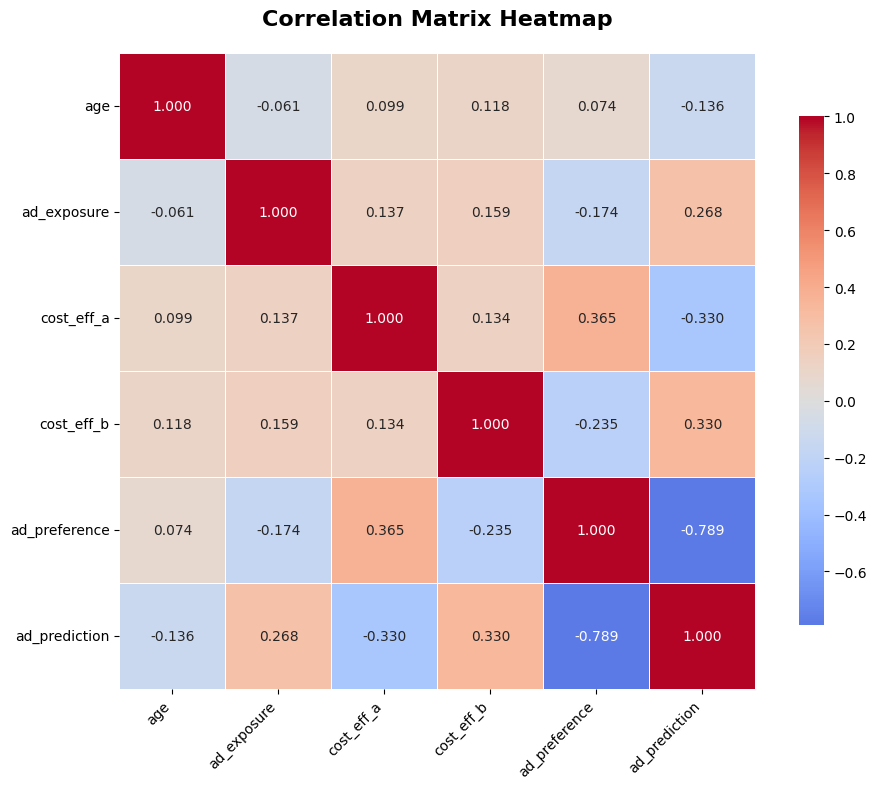

Correlation Matrix:
                 age  ad_exposure  cost_eff_a  cost_eff_b  ad_preference  \
age            1.000       -0.061       0.099       0.118          0.074   
ad_exposure   -0.061        1.000       0.137       0.159         -0.174   
cost_eff_a     0.099        0.137       1.000       0.134          0.365   
cost_eff_b     0.118        0.159       0.134       1.000         -0.235   
ad_preference  0.074       -0.174       0.365      -0.235          1.000   
ad_prediction -0.136        0.268      -0.330       0.330         -0.789   

               ad_prediction  
age                   -0.136  
ad_exposure            0.268  
cost_eff_a            -0.330  
cost_eff_b             0.330  
ad_preference         -0.789  
ad_prediction          1.000  


In [41]:
correlation_matrix = dff[['age', 'ad_exposure', 'cost_eff_a', 'cost_eff_b', 'ad_preference', 'ad_prediction']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme (blue-white-red)
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            fmt='.3f',            # Format numbers to 3 decimal places
            cbar_kws={'shrink': 0.8},  # Adjust colorbar size
            linewidths=0.5)       # Add lines between cells

plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')  # Remove x-axis label (redundant with tick labels)
plt.ylabel('')  # Remove y-axis label (redundant with tick labels)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

plt.tight_layout()

plt.show()

# Optional: Print the correlation matrix values
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Using only age, ad_exposure, cost-efficiency and ad preference feature

In [38]:
# Step 1: Define the features and target
# features = ['age', 'gender', 'ad_exposure', 'ai_exposure', 'cost_eff_a', 'cost_eff_b', 'ad_preference']
features = ['age', 'ad_exposure', 'cost_eff_a', 'cost_eff_b', 'ad_preference']
target_col = 'ad_prediction'  # Replace with your actual target column name

# Step 2: Clean and filter the data
df_model = dff[features + [target_col]].dropna()

# Ensure target is binary (0/1)
df_model = df_model[df_model[target_col].isin([1, 2])]
df_model['target_bin'] = df_model[target_col].apply(lambda x: 1 if x == 2 else 0)

# Step 3: Add constant for intercept
X = sm.add_constant(df_model[features])
y = df_model['target_bin']

# Step 4: Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Step 5: Display the summary
print(logit_model.summary())

# Step 6: Predict and evaluate
y_pred = (logit_model.predict(X) > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Class 1', 'Class 2']))

Optimization terminated successfully.
         Current function value: 0.258454
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             target_bin   No. Observations:                  180
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            5
Date:                Sat, 09 Aug 2025   Pseudo R-squ.:                  0.6271
Time:                        11:06:12   Log-Likelihood:                -46.522
converged:                       True   LL-Null:                       -124.76
Covariance Type:            nonrobust   LLR p-value:                 5.602e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.4950      1.686      2.666      0.008       1.190       7.800
age              -0.

## Key metrics:

True Negatives (TN): 84 - correctly predicted as class 0
False Positives (FP): 7 - incorrectly predicted as class 1 (Type I error)
False Negatives (FN): 9 - incorrectly predicted as class 0 (Type II error)
True Positives (TP): 80 - correctly predicted as class 1

## Performance summary:

Total samples: 180
Correct predictions: 164 (84 + 80)
Accuracy: 91.1% (164/180)
Precision for class 1: 92.0% (80/87) - of predicted positives, how many were correct
Recall for class 1: 89.9% (80/89) - of actual positives, how many were caught
Precision for class 0: 90.3% (84/93)
Recall for class 0: 92.3% (84/91)


# Hypothesis analysis

## H1: AI-generated Ads are perceived to be more creative than human-created Ads

Not accepted due to non-significance (No)

## H2: Human-created Ads are perceived to be more authentic than AI-generated Ads 

Not accepted due to non-significance (No)

## H3: AI-generated Ads are perceived to be faster to produce than human-created Ads

Not accepted due to non-significance (No)

## H4: AI-generated Ads are perceived to be more cost efficient than human-created Ads

Accepted due to significance (Yes)